<a href="https://colab.research.google.com/github/likhith1409/FraudGuard-An-Advanced-Credit-Card-Fraud-Detection-System./blob/main/FraudGuard_An_Advanced_Credit_Card_Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FraudGuard: An Advanced Credit Card Fraud Detection System**
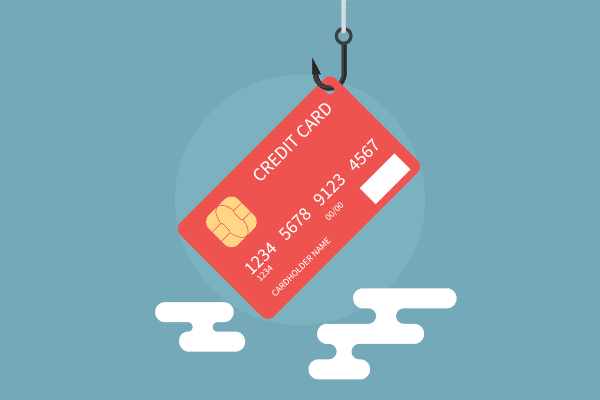

# **Import Libraries and Load Dataset**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [4]:
from google.colab import files

uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [5]:
data = pd.read_csv('creditcard.csv')

# **Display Basic Information about the Dataset**

In [6]:
# Display Top 5 Rows
print("Top 5 Rows of the Dataset:")
print(data.head())

# Display Last 5 Rows
print("\nLast 5 Rows of the Dataset:")
print(data.tail())

# Find Shape of the Dataset
print("\nShape of the Dataset (Number of Rows and Number of Columns):")
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Top 5 Rows of the Dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

     

# **Explore Dataset Information**

In [7]:
# Get Information About the Dataset
print("\nInformation About the Dataset:")
print(data.info())

# Check Null Values
print("\nNull Values in the Dataset:")
print(data.isnull().sum())


Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

# **Data Preprocessing - Feature Scaling and Handling Duplicates**

In [8]:
# Feature Scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(pd.DataFrame(data['Amount']))

# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

# Remove duplicated values
data = data.drop_duplicates()

# **Explore Class Distribution**


Class Distribution:
0    275190
1       473
Name: Class, dtype: int64


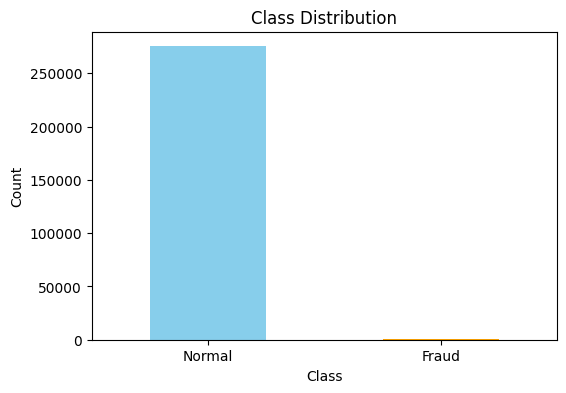

In [9]:
# Display class distribution
print("\nClass Distribution:")
print(data['Class'].value_counts())

# Visualize class distribution with matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'], rotation=0)
plt.show()

# **Train-Test Split**

In [55]:

# Store feature matrix in X and response (target) in vector y
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


#  **Handling Imbalanced Dataset - Undersampling**

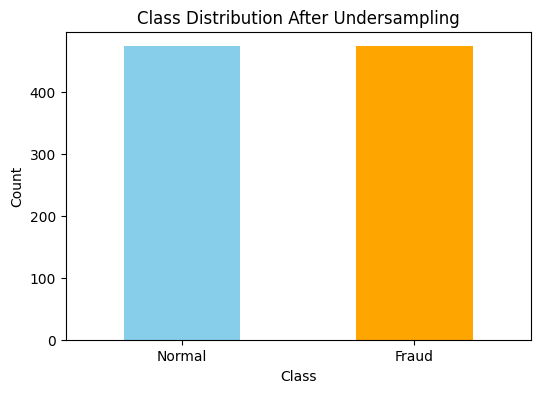

In [45]:
# Undersampling
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]
normal_sample = normal.sample(n=len(fraud))
undersampled_data = pd.concat([normal_sample, fraud], ignore_index=True)

# Visualize class distribution after undersampling with matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
undersampled_data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'], rotation=0)
plt.show()

# Split the undersampled data
X_under, y_under = undersampled_data.drop('Class', axis=1), undersampled_data['Class']
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.20, random_state=42)

# **Logistic Regression Model**

In [46]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_under, y_train_under)

# Evaluate Logistic Regression
y_pred_log = log_model.predict(X_test_under)
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test_under, y_pred_log))
print("Precision:", precision_score(y_test_under, y_pred_log))
print("Recall:", recall_score(y_test_under, y_pred_log))
print("F1 Score:", f1_score(y_test_under, y_pred_log))


Logistic Regression Metrics:
Accuracy: 0.9473684210526315
Precision: 0.9791666666666666
Recall: 0.9215686274509803
F1 Score: 0.9494949494949494


# **Decision Tree Model**

In [47]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_under, y_train_under)

# Evaluate Decision Tree Classifier
y_pred_dt = dt_model.predict(X_test_under)
print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test_under, y_pred_dt))
print("Precision:", precision_score(y_test_under, y_pred_dt))
print("Recall:", recall_score(y_test_under, y_pred_dt))
print("F1 Score:", f1_score(y_test_under, y_pred_dt))



Decision Tree Classifier Metrics:
Accuracy: 0.9052631578947369
Precision: 0.92
Recall: 0.9019607843137255
F1 Score: 0.9108910891089109


# **Random Forest Model**

In [48]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_under, y_train_under)

# Evaluate Random Forest Classifier
y_pred_rf = rf_model.predict(X_test_under)
print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test_under, y_pred_rf))
print("Precision:", precision_score(y_test_under, y_pred_rf))
print("Recall:", recall_score(y_test_under, y_pred_rf))
print("F1 Score:", f1_score(y_test_under, y_pred_rf))



Random Forest Classifier Metrics:
Accuracy: 0.9421052631578948
Precision: 0.9690721649484536
Recall: 0.9215686274509803
F1 Score: 0.9447236180904522


# **Visualize Performance Metrics**

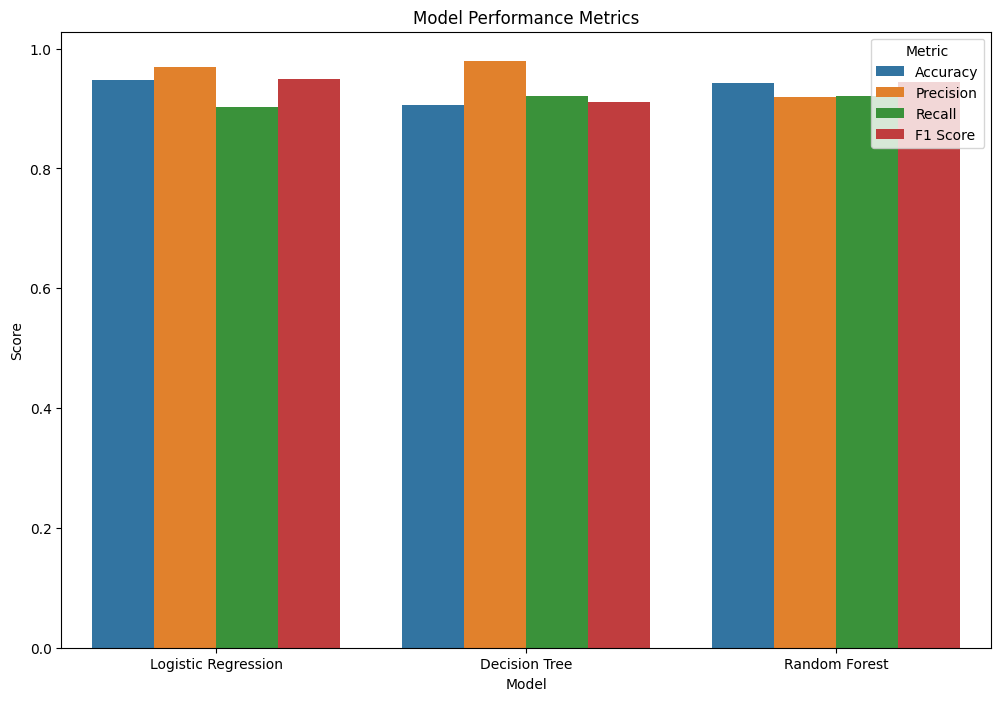

In [49]:
# Visualize Performance Metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [
    [accuracy_score(y_test_under, y_pred_log), precision_score(y_test_under, y_pred_log),
     recall_score(y_test_under, y_pred_log), f1_score(y_test_under, y_pred_log)],
    [accuracy_score(y_test_under, y_pred_dt), precision_score(y_test_under, y_pred_dt),
     recall_score(y_test_under, y_pred_dt), f1_score(y_test_under, y_pred_dt)],
    [accuracy_score(y_test_under, y_pred_rf), precision_score(y_test_under, y_pred_rf),
     recall_score(y_test_under, y_pred_rf), f1_score(y_test_under, y_pred_rf)]
]

# Create a DataFrame for better visualization
performance_df = pd.DataFrame({
    'Model': models * len(metrics),
    'Metric': metrics * len(models),
    'Score': [score for sublist in scores for score in sublist]
})

# Plot the performance metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_df)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

# **Visualize Confusion Matrix**


Metrics for Logistic Regression:
Accuracy: 0.9474
Precision: 0.9792
Recall: 0.9216

Metrics for Decision Tree:
Accuracy: 0.9053
Precision: 0.9200
Recall: 0.9020

Metrics for Random Forest:
Accuracy: 0.9421
Precision: 0.9691
Recall: 0.9216


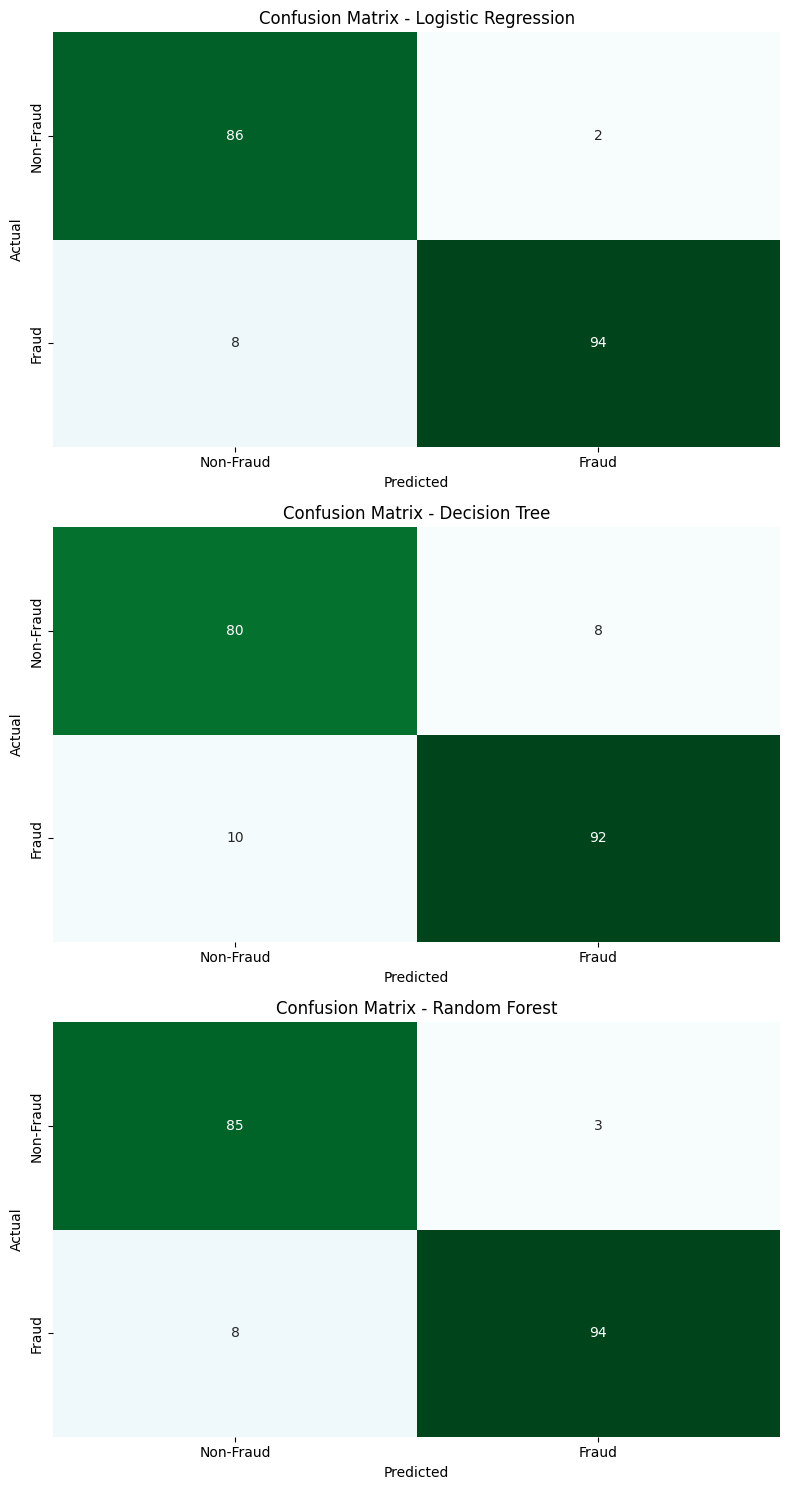

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test, y_pred_log, y_pred_dt, y_pred_rf are defined

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
predictions = [y_pred_log, y_pred_dt, y_pred_rf]

plt.figure(figsize=(8, 15))

for i, model in enumerate(models, 1):
    plt.subplot(3, 1, i)
    cm = confusion_matrix(y_test_under, predictions[i-1])
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn', cbar=False,
                xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Print performance metrics
    acc = accuracy_score(y_test_under, predictions[i-1])
    prec = precision_score(y_test_under, predictions[i-1])
    rec = recall_score(y_test_under, predictions[i-1])
    print(f"\nMetrics for {model}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")

plt.tight_layout()
plt.show()



# **Save Models using Pickle**

In [51]:
import pickle

# Save the models using pickle
with open("random_forest_model.pkl", "wb") as rf_file:
    pickle.dump(rf_model, rf_file)

with open("logistic_regression_model.pkl", "wb") as log_file:
    pickle.dump(log_model, log_file)

with open("decision_tree_model.pkl", "wb") as dt_file:
    pickle.dump(dt_model, dt_file)


# **Example Prediction with Saved Random Forest Model using Pickle**

In [52]:
# Cell 12: Example Prediction with Saved Random Forest Model using Pickle
# Load the Random Forest model using pickle
with open("random_forest_model.pkl", "rb") as rf_file:
    loaded_model_rf_pickle = pickle.load(rf_file)

# Example Prediction with the loaded Random Forest model
example_input_features_df = pd.DataFrame([[1, 1, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
                                          columns=X.columns)

example_prediction_rf_pickle = loaded_model_rf_pickle.predict(example_input_features_df)

print("\nExample Prediction with Loaded Random Forest Model (Pickle):", "Normal Transaction" if example_prediction_rf_pickle == 0 else "Fraudulent Transaction")



Example Prediction with Loaded Random Forest Model (Pickle): Normal Transaction


# **Example Prediction with Saved Decision Tree Model using Pickle**

In [53]:
# Load the Decision Tree model using pickle
with open("decision_tree_model.pkl", "rb") as dt_file:
    loaded_model_dt_pickle = pickle.load(dt_file)

# Example input features for Decision Tree
example_input_features_dt_df = pd.DataFrame([[1, 1, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
                                          columns=X.columns)

# Ensure the number of columns matches the number of features used during training
assert len(example_input_features_dt_df.columns) == loaded_model_dt_pickle.n_features_in_, \
    "Number of columns in the DataFrame does not match the model's expectations."

# Make sure the order of columns matches the order used during training
example_input_features_dt_df = example_input_features_dt_df[X.columns]

# Make prediction
example_prediction_dt_pickle = loaded_model_dt_pickle.predict(example_input_features_dt_df)

print("\nExample Prediction with Loaded Decision Tree Model (Pickle):",
      "Normal Transaction" if example_prediction_dt_pickle == 0 else "Fraudulent Transaction")



Example Prediction with Loaded Decision Tree Model (Pickle): Normal Transaction


# **Example Prediction with Saved Logistic Regression Model using Pickle**

In [54]:
with open("logistic_regression_model.pkl", "rb") as log_file:
    loaded_model_log_pickle = pickle.load(log_file)

# Example input features for Logistic Regression
example_input_features_log_df = pd.DataFrame([[1, 1, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
                                          columns=X.columns)

# Ensure the number of columns matches the number of features used during training
assert len(example_input_features_log_df.columns) == loaded_model_log_pickle.n_features_in_, \
    "Number of columns in the DataFrame does not match the model's expectations."

# Make sure the order of columns matches the order used during training
example_input_features_log_df = example_input_features_log_df[X.columns]

# Make prediction
example_prediction_log_pickle = loaded_model_log_pickle.predict(example_input_features_log_df)

print("\nExample Prediction with Loaded Logistic Regression Model (Pickle):",
      "Normal Transaction" if example_prediction_log_pickle == 0 else "Fraudulent Transaction")



Example Prediction with Loaded Logistic Regression Model (Pickle): Normal Transaction
